<h2> Developing Simple, Multiple and Ploynomial Linear Regressions </h2>

<b> By Michael Kumakech</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2> PART 1: Simple linear Regression</h2>

In [3]:
df = pd.read_csv("automobileEDA.csv", encoding = "latin1")

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [7]:
df2 =df[['width', 'curb-weight', 'engine-size','horsepower','highway-mpg', 'city-L/100km','price']]
df2.head()

,width,curb-weight,engine-size,horsepower,highway-mpg,city-L/100km,price
0,0.890278,2548,130,111.0,27,11.190476,13495.0
1,0.890278,2548,130,111.0,27,11.190476,16500.0
2,0.909722,2823,152,154.0,26,12.368421,16500.0
3,0.919444,2337,109,102.0,30,9.791667,13950.0
4,0.922222,2824,136,115.0,22,13.055556,17450.0


In [9]:
df2.corr()

,width,curb-weight,engine-size,horsepower,highway-mpg,city-L/100km,price
width,1.000000,0.866201,0.729436,0.615077,-0.680635,0.673363,0.751265
curb-weight,0.866201,1.000000,0.849072,0.757976,-0.794889,0.785353,0.834415
engine-size,0.729436,0.849072,1.000000,0.822676,-0.679571,0.745059,0.872335
horsepower,0.615077,0.757976,0.822676,1.000000,-0.804575,0.889488,0.809575
highway-mpg,-0.680635,-0.794889,-0.679571,-0.804575,1.000000,-0.930028,-0.704692
city-L/100km,0.673363,0.785353,0.745059,0.889488,-0.930028,1.000000,0.789898
price,0.751265,0.834415,0.872335,0.809575,-0.704692,0.789898,1.000000


<b> Regression Plot</b>

In [10]:
import seaborn as sns


(0.0, 53351.79852930893)

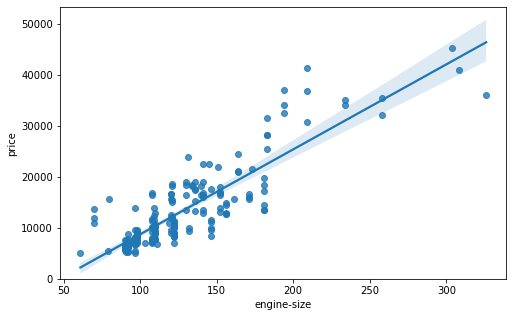

In [14]:
width =8
height = 5
plt.figure(figsize =(width, height))
sns.regplot(x ='engine-size', y = 'price' , data =df2)
plt.ylim(0,)

(0.0, 48164.76735766444)

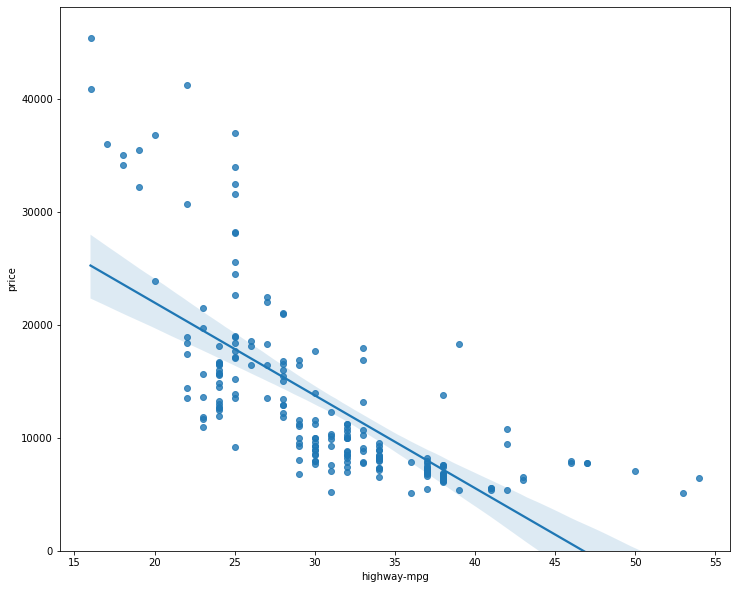

In [18]:
width =12
height = 10
plt.figure(figsize =(width, height))
sns.regplot(x ='highway-mpg', y = 'price' , data =df2)
plt.ylim(0,)

<h2> PART 1: Simple Linear Regression</h2>

<b> Develop the Model</b>

<b> Plot Multiple Linear Regession Graph</b>

<b> Compute the Slope and the intercept</b>

<h2> PART 2: Multiple linear Regression</h2>

<b> Develop the Model</b>

<b> Plot Multiple Linear Regession Graph</b>

<b> Compute the Slopes and the intercepts</b>

<b> Evaluate the model by getting R-squared and MSE values</b>

<h2> PART 3: Polynomial linear Regression</h2>

In [24]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [25]:
x  =df2['highway-mpg']
y = df2['price']

In [28]:
# we fit the ploynomial and use order 3 ploynomial
f = np.polyfit(x,y, 3)
p = np.poly1d(f)
print('The Polynomial Regression model is:')
print(p)

The Polynomial Regression model is:
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


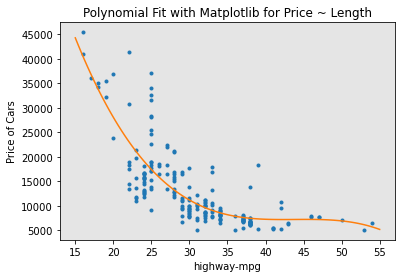

In [31]:
PlotPolly(p,x, y, "highway-mpg")

<h2> Evaluation of the Model</h2>

In [32]:
from sklearn.metrics import r2_score

In [33]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<b> Get the MSE Value</b>